## SARIMAX Model

### 1. Import libraries and get data

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm

In [13]:
# Load the dataset
df = pd.read_csv("./ETH.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-05-12,86.99
2017-05-13,89.90
2017-05-14,90.37
2017-05-15,92.56
2017-05-16,88.17
...,...
2023-06-08,1845.68
2023-06-09,1840.41
2023-06-10,1751.56


### 2. Split the data into training, test and validate sets

In [14]:
train_size = int(0.7 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (333, 1)
Validate shape: (334, 1)


In [15]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1333, 1)
Test shape: (444, 1)
Validate shape: (446, 1)


In [16]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (444, 1)
Validate shape: (223, 1)


## 3. Perform SARIMAX Model

Exogenous variable

In [17]:
train_data['seasonal_index'] = train_data.index.day

C:\Users\PHUTRAN\AppData\Local\Temp\ipykernel_9804\586218167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['seasonal_index'] = train_data.index.day


### 3.1 Build the best SARIMAX Model from auto_arima

In [18]:
# SARIMAX Model
import pmdarima as pmd

SARIMAX_model = pmd.auto_arima(train_data[['Price']], 
                        exogenous=train_data[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=20978.846, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=17608.774, Time=4.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=19686.466, Time=2.48 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=20993.691, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=18157.146, Time=0.17 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=17452.979, Time=14.57 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=11.89 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=20937.503, Time=6.47 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=12.99 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=17442.975, Time=12.42 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=17586.075, Time=8.32 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=inf, Time=17.18 sec
 ARIMA(1,0,1)(1,1,1)[12] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1556
Model:             SARIMAX(3, 0, 3)x(2, 1, [], 12)   Log Likelihood               -8661.308
Date:                             Mon, 12 Jun 2023   AIC                          17342.616
Time:                                     23:48:59   BIC                          17396.037
Sample:                                 05-12-2017   HQIC                         17362.489
                                      - 08-14-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4613      2.528      0.578      0.563      -3.494       6.416
ar.L1          1.3261      0.015     88.218      0.000       1.297       1.356
ar.L2         -1.1383      0.020    -56.470      0.000      -1.178      -1.099
ar.L3          0.7765      0.012     67.153      0.000       0.754       0.799
ma.L1         -0.4840      0.019    -25.751      0.000      -0.521      -0.447
ma.L2          0.9945      0.008    124.582      0.000       0.979       1.010
ma.L3         -0.1602      0.014    -11.722      0.000      -0.187      -0.133
ar.S.L12      -0.7605      0.008    -94.780      0.000      -0.776      -0.745
ar.S.L24      -0.3289      0.011    -28.828      0.000      -0.351      -0.307
sigma2      4318.6912     49.279     87.637      0.000    4222.106    4415.277
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):            100852.75
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               6.69   Skew:                            -1.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.2 Evaluate on Validate data

In [19]:
def evaluate_sarimax_model(y_data):
    predictions = (SARIMAX_model.predict(n_periods=len(y_data))).values
    mse = mean_squared_error(y_data, predictions)
    mae = mean_absolute_error(y_data, predictions)
    mape = mean_absolute_percentage_error(y_data, predictions)
    rmse = mean_squared_error(y_data, predictions, squared=False)
    return predictions, mse, mae, mape, rmse

In [20]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data)
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_sarimax_model(y_val)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [3267.67204579 3375.69828223 3328.00277467 3271.14001908 3354.37901935
 3329.43901339 3332.72391806 3325.22504905 3331.20257899 3300.90294744
 3359.68036115 3410.22866538 3344.77288576 3478.82045892 3511.97918494
 3522.42469487 3646.42100371 3578.31632588 3630.63292595 3634.8089328
 3655.04750426 3598.98512168 3725.21374529 3717.85550394 3657.18348002
 3791.38795448 3796.19264877 3781.97066649 3924.69482487 3836.63430713
 3885.95325054 3863.56662384 3867.6527838  3790.77317025 3926.07001718
 3915.13602315 3862.65396843 3978.33770505 3967.90578097 3939.68103245
 4044.64465806 3976.71491691 4003.19373669 3987.91041718 3990.37409323
 3929.13339284 4027.15949038 4029.84092928 3961.34245188 4083.08431474
 4086.01316188 4069.23455423 4189.45673604 4105.56999972 4143.46501985
 4124.85973732 4127.34043065 4054.5856032  4171.65756591 4159.08130321
 4094.17118108 4211.59527106 4203.67312327 4177.26016293 4292.94348152
 4209.34194323 4240.93303439 4217.50093914 421

### 3.3 Evaluate on Test data

In [21]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_sarimax_model(y_test)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [3267.67204579 3375.69828223 3328.00277467 3271.14001908 3354.37901935
 3329.43901339 3332.72391806 3325.22504905 3331.20257899 3300.90294744
 3359.68036115 3410.22866538 3344.77288576 3478.82045892 3511.97918494
 3522.42469487 3646.42100371 3578.31632588 3630.63292595 3634.8089328
 3655.04750426 3598.98512168 3725.21374529 3717.85550394 3657.18348002
 3791.38795448 3796.19264877 3781.97066649 3924.69482487 3836.63430713
 3885.95325054 3863.56662384 3867.6527838  3790.77317025 3926.07001718
 3915.13602315 3862.65396843 3978.33770505 3967.90578097 3939.68103245
 4044.64465806 3976.71491691 4003.19373669 3987.91041718 3990.37409323
 3929.13339284 4027.15949038 4029.84092928 3961.34245188 4083.08431474
 4086.01316188 4069.23455423 4189.45673604 4105.56999972 4143.46501985
 4124.85973732 4127.34043065 4054.5856032  4171.65756591 4159.08130321
 4094.17118108 4211.59527106 4203.67312327 4177.26016293 4292.94348152
 4209.34194323 4240.93303439 4217.50093914 4215.63

### 3.4 Predict price for the next 30 days

In [22]:
last_index = len(df)
date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = (SARIMAX_model.predict(n_periods=len(x_next_30_days))).values

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3267.67204579 3375.69828223 3328.00277467 3271.14001908 3354.37901935
 3329.43901339 3332.72391806 3325.22504905 3331.20257899 3300.90294744
 3359.68036115 3410.22866538 3344.77288576 3478.82045892 3511.97918494
 3522.42469487 3646.42100371 3578.31632588 3630.63292595 3634.8089328
 3655.04750426 3598.98512168 3725.21374529 3717.85550394 3657.18348002
 3791.38795448 3796.19264877 3781.97066649 3924.69482487 3836.63430713]


### 4.  Evaluate accuracy validate, test data

In [23]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

df = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(df)


                   MSE          MAE      MAPE         RMSE
Validate  7.364043e+06  2702.978036  1.745206  2713.676946
Test      5.489651e+06  1947.227134  1.129460  2343.000496


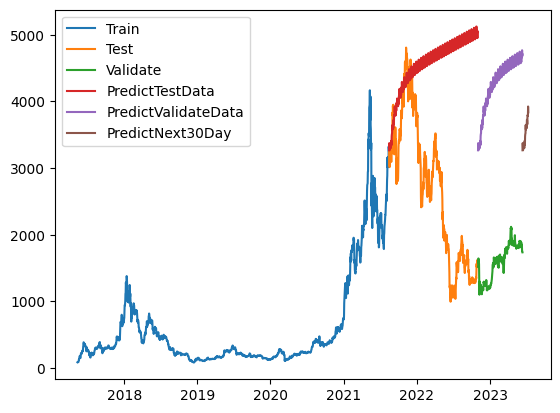

In [24]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()